In [1]:
##Importing the Libraries
import cv2 as cv

In [2]:
##loading the cascade Classifier to recognize the images
haar_cascade = cv.CascadeClassifier('haar_face.xml')
count=0

## Procedure to save our faces 

Run the code below to save faces of yours with mask

In [6]:
##open the camera using cv
capture = cv.VideoCapture(0)

while True:
    ##saving the frames
    ret,frame = capture.read()
    
    #detecting the coordinates of the face
    faces_rect = haar_cascade.detectMultiScale(frame,1.35,5)
    
    for (x,y,w,h) in faces_rect:
        count=count+1
        name='./Images/FaceMask/' + str(count) + '.jpg'
        print("Creating the image :"+name)
        cv.imwrite(name,frame[y:y+h,x:x+w])
        cv.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),2)
    cv.imshow("Frame",frame)
    
    cv.waitKey(1) 
    if count>500:
        break
        
capture.release()

cv.destroyAllWindows()

Creating the image :./Images/FaceMask/1.jpg
Creating the image :./Images/FaceMask/2.jpg
Creating the image :./Images/FaceMask/3.jpg
Creating the image :./Images/FaceMask/4.jpg
Creating the image :./Images/FaceMask/5.jpg
Creating the image :./Images/FaceMask/6.jpg
Creating the image :./Images/FaceMask/7.jpg
Creating the image :./Images/FaceMask/8.jpg
Creating the image :./Images/FaceMask/9.jpg
Creating the image :./Images/FaceMask/10.jpg
Creating the image :./Images/FaceMask/11.jpg
Creating the image :./Images/FaceMask/12.jpg
Creating the image :./Images/FaceMask/13.jpg
Creating the image :./Images/FaceMask/14.jpg
Creating the image :./Images/FaceMask/15.jpg
Creating the image :./Images/FaceMask/16.jpg
Creating the image :./Images/FaceMask/17.jpg
Creating the image :./Images/FaceMask/18.jpg
Creating the image :./Images/FaceMask/19.jpg
Creating the image :./Images/FaceMask/20.jpg
Creating the image :./Images/FaceMask/21.jpg
Creating the image :./Images/FaceMask/22.jpg
Creating the image 

Creating the image :./Images/FaceMask/183.jpg
Creating the image :./Images/FaceMask/184.jpg
Creating the image :./Images/FaceMask/185.jpg
Creating the image :./Images/FaceMask/186.jpg
Creating the image :./Images/FaceMask/187.jpg
Creating the image :./Images/FaceMask/188.jpg
Creating the image :./Images/FaceMask/189.jpg
Creating the image :./Images/FaceMask/190.jpg
Creating the image :./Images/FaceMask/191.jpg
Creating the image :./Images/FaceMask/192.jpg
Creating the image :./Images/FaceMask/193.jpg
Creating the image :./Images/FaceMask/194.jpg
Creating the image :./Images/FaceMask/195.jpg
Creating the image :./Images/FaceMask/196.jpg
Creating the image :./Images/FaceMask/197.jpg
Creating the image :./Images/FaceMask/198.jpg
Creating the image :./Images/FaceMask/199.jpg
Creating the image :./Images/FaceMask/200.jpg
Creating the image :./Images/FaceMask/201.jpg
Creating the image :./Images/FaceMask/202.jpg
Creating the image :./Images/FaceMask/203.jpg
Creating the image :./Images/FaceM

Creating the image :./Images/FaceMask/363.jpg
Creating the image :./Images/FaceMask/364.jpg
Creating the image :./Images/FaceMask/365.jpg
Creating the image :./Images/FaceMask/366.jpg
Creating the image :./Images/FaceMask/367.jpg
Creating the image :./Images/FaceMask/368.jpg
Creating the image :./Images/FaceMask/369.jpg
Creating the image :./Images/FaceMask/370.jpg
Creating the image :./Images/FaceMask/371.jpg
Creating the image :./Images/FaceMask/372.jpg
Creating the image :./Images/FaceMask/373.jpg
Creating the image :./Images/FaceMask/374.jpg
Creating the image :./Images/FaceMask/375.jpg
Creating the image :./Images/FaceMask/376.jpg
Creating the image :./Images/FaceMask/377.jpg
Creating the image :./Images/FaceMask/378.jpg
Creating the image :./Images/FaceMask/379.jpg
Creating the image :./Images/FaceMask/380.jpg
Creating the image :./Images/FaceMask/381.jpg
Creating the image :./Images/FaceMask/382.jpg
Creating the image :./Images/FaceMask/383.jpg
Creating the image :./Images/FaceM

In [ ]:
count=0

Run the code below to save faces of yours without mask

In [ ]:
##open the camera using cv
capture = cv.VideoCapture(0)

while True:
    ##saving the frames
    ret,frame = capture.read()
    
    #detecting the coordinates of the face
    faces_rect = haar_cascade.detectMultiScale(frame,1.35,5)
    
    for (x,y,w,h) in faces_rect:
        count=count+1
        name='./Images/FaceWithoutMask/' + str(count) + '.jpg'
        print("Creating the image :"+name)
        cv.imwrite(name,frame[y:y+h,x:x+w])
        cv.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),2)
    cv.imshow("Frame",frame)
    
    cv.waitKey(1) 
    if count>500:
        break
        
capture.release()

cv.destroyAllWindows()

In [3]:
##Importing the libraries
import warnings
warnings.filterwarnings('ignore')
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D,Activation,Dropout,Flatten
from tensorflow.keras.optimizers import Adam

In [4]:
DIM = (32,32,3)    #dimensions of our image
path = 'Images'    #path to store images
images=[]
classNo=[]
myList = os.listdir(path)
numClasses = len(myList)

## Rename the FaceMask as 0 in folder and FaceWithoutMask as 1

In [5]:
##Preproccessing of Images
for x in range(0,numClasses):
    myList = os.listdir(path+"/"+str(x))
    
    for y in myList:
        curImg = cv.imread(path+"/"+str(x)+"/"+y)
        curImg = cv.resize(curImg,(DIM[0],DIM[1]))
        images.append(curImg)
        classNo.append(x)
    print(x)
    
images=np.array(images)
classNo=np.array(classNo)

0
1


In [6]:
len(images)

1002

In [7]:
# training and testing splitting

X_train,X_test,Y_train,Y_test = train_test_split(images,classNo,test_size=0.2)
X_train,X_validation,Y_train,Y_validation = train_test_split(images,classNo,test_size=0.2)

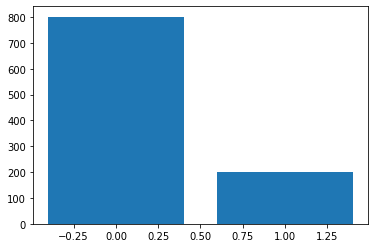

In [9]:
#plotting of our train and testing data
plt.bar(range(0,numClasses),(len(X_train),len(X_test)))
plt.show()

In [11]:
#preprocessing of our images

def preprocessing(img):
    img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)  ##Converting our images to gray
    img = cv.equalizeHist(img)    ##output is histogram equalized
    img=img/255  ## Normalizing the images
    return img

In [12]:
##Applying the preprocessing for evry image
X_train = np.array(list(map(preprocessing,X_train)))
X_test = np.array(list(map(preprocessing,X_test)))
X_validation = np.array(list(map(preprocessing,X_validation)))

In [14]:
X_train.shape

(801, 32, 32)

In [15]:
##Reshaping the images dimensions
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
X_validation = X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)

In [15]:
X_train.shape

(801, 32, 32, 1)

In [16]:
##using the ImageDataGenerator
dataGen = ImageDataGenerator(
    width_shift_range=0.1, #shift the image to the left or right(horizontal shifts)
    height_shift_range=0.1, #shift the image to the top or bottom(horizontal shifts)
    zoom_range=0.2,  #Zooms the image by 20%
    shear_range=0.1,  #Shears the image by 10%
    rotation_range=10)  #Rotation by 10 degrees

In [17]:
dataGen.fit(X_train)

In [18]:
##one hot encoding all the labelled data
Y_train = to_categorical(Y_train,num_classes=numClasses)
Y_test = to_categorical(Y_test,num_classes=numClasses)
Y_validation = to_categorical(Y_validation,num_classes=numClasses)

In [19]:
##Building the CNN Model

def Model():
    model = Sequential()
    model.add(Conv2D(32,(3,3),input_shape=(DIM[0],DIM[1],1),activation='relu'))
    model.add(Conv2D(32,(3,3),activation='relu'))
    model.add(MaxPooling2D((2,2)))
              
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.5))
              
    model.add(Flatten())
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(numClasses,activation='softmax'))
    
    model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])   

    return model

In [20]:
model = Model()

In [21]:
##Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [22]:
#Fiiting the data and saving it in the history variable
history = model.fit_generator(dataGen.flow(X_train,Y_train,batch_size=32),
                                          steps_per_epoch=25,  
                                          epochs=5,
                                          validation_data=(X_validation,Y_validation),
                                          shuffle=True)

Epoch 1/5
25/25 [==============================] - 4s 89ms/step - loss: 0.6902 - accuracy: 0.5436 - val_loss: 0.6779 - val_accuracy: 1.0000
Epoch 2/5
25/25 [==============================] - 2s 62ms/step - loss: 0.6348 - accuracy: 0.6229 - val_loss: 0.4236 - val_accuracy: 0.9950
Epoch 3/5
25/25 [==============================] - 2s 60ms/step - loss: 0.3913 - accuracy: 0.8466 - val_loss: 0.0592 - val_accuracy: 1.0000
Epoch 4/5
25/25 [==============================] - 2s 60ms/step - loss: 0.1426 - accuracy: 0.9584 - val_loss: 3.7191e-04 - val_accuracy: 1.0000
Epoch 5/5
25/25 [==============================] - 2s 62ms/step - loss: 0.0487 - accuracy: 0.9831 - val_loss: 1.6579e-04 - val_accuracy: 1.0000


In [23]:
##Saving the model
model.save('MaskModel.h5')

In [24]:
##Testing

In [25]:
import cv2 as cv
from keras.models import load_model

In [26]:
haar_cascade = cv.CascadeClassifier('haar_face.xml')
model = load_model('MaskModel.h5')

In [27]:
def preprocessing(img):
    img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    img = cv.equalizeHist(img)
    img = img/255
    return img

In [29]:
##proving the ClassName for given Number
def get_className(classNo):
    if classNo==0:
        return "Mask"
    elif classNo==1:
        return "NO Mask"

In [30]:
threshold = 0.9

In [31]:
capture = cv.VideoCapture(0)    #open the camera using opencv

while True:
    ret,frames = capture.read()  ##reading the frames
    faces_rect = haar_cascade.detectMultiScale(frames,1.3,5)  #detecting the coordinates of face
    
    for x,y,w,h in faces_rect:
        ##preprocessing of images
        crop_img = frames[y:y+h,x:x+w]
        img = cv.resize(crop_img,(32,32))
        img = preprocessing(img)
        img = img.reshape(1,32,32,1)
        
        classIndex = np.argmax(model.predict(img), axis=-1) #predicting the index of image
        confidence = np.max(model.predict(img)) #predicting the confidence
        
        ##drawing rectangles and writing confidences
        if confidence > threshold:
            if classIndex == 0:
                cv.rectangle(frames,(x,y),(x+w,y+h),(0,255,0),2)
                cv.putText(frames,str(str(get_className(classIndex))+":"+str(confidence)),(x,y-10),cv.FONT_HERSHEY_COMPLEX,1.0,(255,255,255),thickness=2)
            if classIndex == 1:
                cv.rectangle(frames,(x,y),(x+w,y+h),(0,0,255),2)
                cv.putText(frames,str(str(get_className(classIndex)) +":"+str(confidence)),(x,y-10),cv.FONT_HERSHEY_COMPLEX,1.0,(255,255,255),thickness=2)
        cv.imshow("Result",frames)
        
    if cv.waitKey(1) & 0xFF == ord('d'):
        break
    
capture.release()
cv.destroyAllWindows()
            
        
        
        

In [32]:
capture.release()